In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os

fpath = "images/"
print(os.listdir(fpath))
dog_emotions = os.listdir(fpath)

['angry', 'happy', 'sad']


In [2]:
X=[]
Y=[]

fullpaths = ["images/{}".format(dog_emotions) for dog_emotions in dog_emotions]

for counter,fullpath in enumerate(fullpaths):
    for imgname in os.listdir(fullpath) :
        X.append([fullpath + '/' + imgname])
        Y.append(dog_emotions[counter])
        
print(X[:10],"\n")
print(Y[:10],'\n')

from itertools import chain
X = list(chain.from_iterable(X)) # to flatten X in 1-d array
print(X[:10],'\n')
len(X)

[['images/angry/100035066_bb2792d5c8_b.jpg'], ['images/angry/10069504164_436856871c_b.jpg'], ['images/angry/1007148341_fdd49a7384_b.jpg'], ['images/angry/1007803967_b4b8ebc62c_b.jpg'], ['images/angry/10131474585_997d88e066_b.jpg'], ['images/angry/1020621584_3895972eda_b.jpg'], ['images/angry/1020769759_f75f7a2297_b.jpg'], ['images/angry/10222334643_1153586191_b.jpg'], ['images/angry/10235296784_792682a57b_b.jpg'], ['images/angry/1023755863_7a7b74d175_b.jpg']] 

['angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry'] 

['images/angry/100035066_bb2792d5c8_b.jpg', 'images/angry/10069504164_436856871c_b.jpg', 'images/angry/1007148341_fdd49a7384_b.jpg', 'images/angry/1007803967_b4b8ebc62c_b.jpg', 'images/angry/10131474585_997d88e066_b.jpg', 'images/angry/1020621584_3895972eda_b.jpg', 'images/angry/1020769759_f75f7a2297_b.jpg', 'images/angry/10222334643_1153586191_b.jpg', 'images/angry/10235296784_792682a57b_b.jpg', 'images/angry/1023755863_7a7b74d175_b.jpg

11572

In [3]:
import random

combine = list(zip(X,Y))
print(combine[:10],"\n")
random.shuffle(combine)
print(combine[:10],"\n")

X[:], Y[:] = zip(*combine) # for parallel iteration in combine
print(X[:10],'\n')
print(Y[:10],'\n')

[('images/angry/100035066_bb2792d5c8_b.jpg', 'angry'), ('images/angry/10069504164_436856871c_b.jpg', 'angry'), ('images/angry/1007148341_fdd49a7384_b.jpg', 'angry'), ('images/angry/1007803967_b4b8ebc62c_b.jpg', 'angry'), ('images/angry/10131474585_997d88e066_b.jpg', 'angry'), ('images/angry/1020621584_3895972eda_b.jpg', 'angry'), ('images/angry/1020769759_f75f7a2297_b.jpg', 'angry'), ('images/angry/10222334643_1153586191_b.jpg', 'angry'), ('images/angry/10235296784_792682a57b_b.jpg', 'angry'), ('images/angry/1023755863_7a7b74d175_b.jpg', 'angry')] 

[('images/happy/19068941728_0d550d1da6_b.jpg', 'happy'), ('images/angry/5547351965_2053a0dc3d_b.jpg', 'angry'), ('images/happy/7796019368_b36531293c_b.jpg', 'happy'), ('images/sad/12208850093_2ed899927f_b.jpg', 'sad'), ('images/happy/3685246795_b27342397e_b.jpg', 'happy'), ('images/angry/8694497107_ab56fba3ae_b.jpg', 'angry'), ('images/sad/8588253574_f73fcd9cac_b.jpg', 'sad'), ('images/happy/4598404502_f56bc5c30e_b.jpg', 'happy'), ('images/

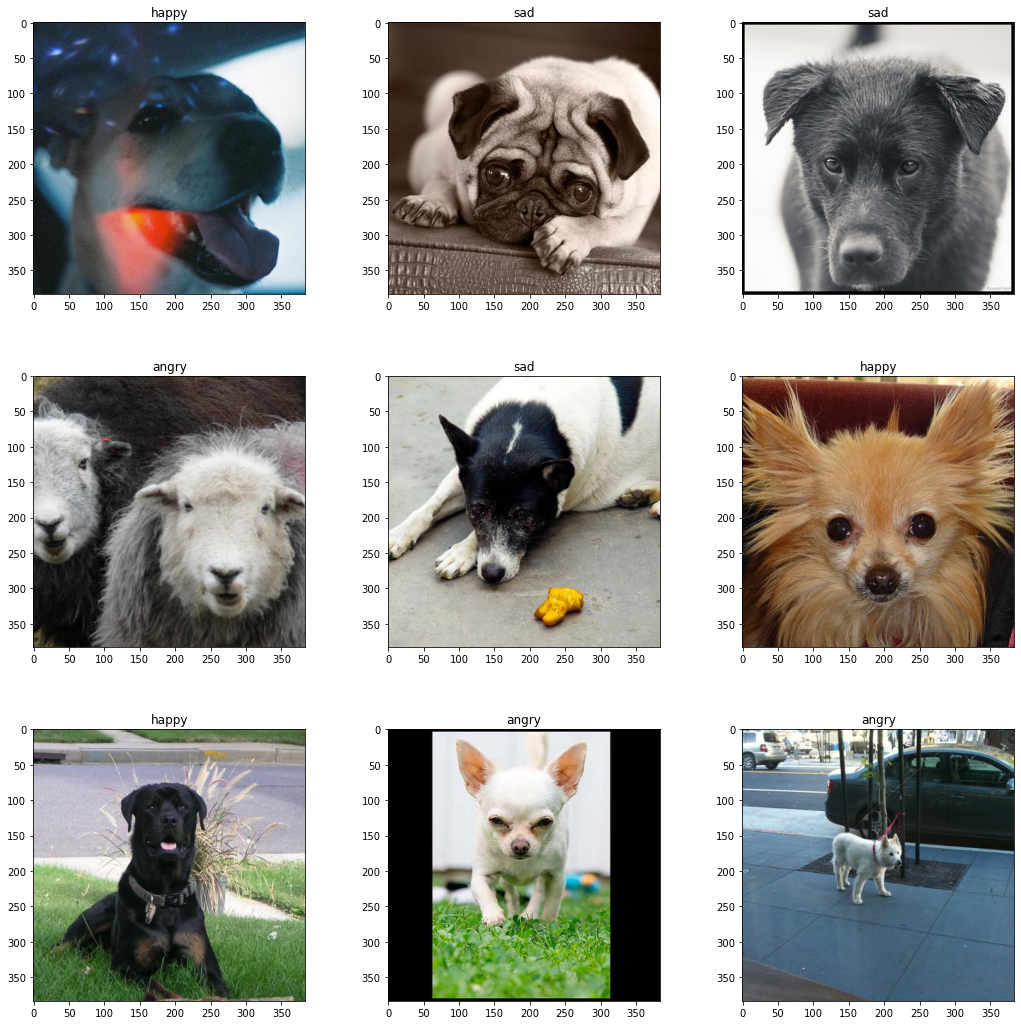

In [4]:
import matplotlib.pyplot as plt

from matplotlib.image import imread

%matplotlib inline

plt.figure(figsize=(18,18))

for counter,i in enumerate(random.sample(range(0,len(X)),9)):
    plt.subplot(3,3,counter+1)
    plt.subplots_adjust(hspace=0.3)
    filename = X[i]
    image = imread(filename)
    plt.imshow(image)
    plt.title(Y[i],fontsize=12)

plt.show()

In [5]:
X = X[:8000]
Y = Y[:8000]

In [6]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)

Y_toc = to_categorical(Y,len(dog_emotions))

Y = np.array(Y_toc)
print(Y.shape)

(8000, 3)


In [7]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import img_to_array, load_img

X = np.array([img_to_array(load_img(img, target_size = (224,224))) for img in X])
print(X.shape)

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size= 0.2,random_state=2)
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size= 0.2,random_state=2)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

x_train = np.array(x_train)
x_val = np.array(x_val)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

(8000, 224, 224, 3)
(5120, 224, 224, 3)
(1280, 224, 224, 3)
(1600, 224, 224, 3)
(5120, 3)
(1280, 3)
(1600, 3)


In [8]:
from keras.preprocessing.image import ImageDataGenerator

batch_size = 32
input_shape = (224,224,3)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# Load the training data
train_data = train_datagen.flow(x_train, y_train, shuffle=False, batch_size=batch_size, seed=1)

val_gen = ImageDataGenerator(preprocessing_function = preprocess_input)

val_data = val_gen.flow(x_val, y_val, shuffle=False, batch_size=batch_size, seed=1)

In [9]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

In [10]:
from keras import models

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))

model = models.Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(3,activation='softmax'))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 batch_normalization (BatchN  (None, 1280)             5120      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 512)               655872    
                                                        

In [12]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
val_steps_per_epoch = x_val.shape[0] // batch_size

history = model.fit(train_data,
          validation_data = val_data,
          validation_steps=val_steps_per_epoch,
          epochs=20)

Epoch 1/20
160/160 [==============================] - 127s 773ms/step - loss: 1.3057 - accuracy: 0.4896 - val_loss: 0.9552 - val_accuracy: 0.5852
Epoch 2/20
160/160 [==============================] - 119s 741ms/step - loss: 0.9433 - accuracy: 0.5887 - val_loss: 1.0093 - val_accuracy: 0.5867
Epoch 3/20
160/160 [==============================] - 115s 722ms/step - loss: 0.8480 - accuracy: 0.6295 - val_loss: 0.9355 - val_accuracy: 0.6102
Epoch 4/20
160/160 [==============================] - 122s 762ms/step - loss: 0.7861 - accuracy: 0.6592 - val_loss: 0.9412 - val_accuracy: 0.6109
Epoch 5/20
160/160 [==============================] - 116s 724ms/step - loss: 0.7530 - accuracy: 0.6727 - val_loss: 0.9677 - val_accuracy: 0.6031
Epoch 6/20
160/160 [==============================] - 119s 741ms/step - loss: 0.7276 - accuracy: 0.6945 - val_loss: 0.9634 - val_accuracy: 0.6156
Epoch 7/20
160/160 [==============================] - 120s 747ms/step - loss: 0.6779 - accuracy: 0.7037 - val_loss: 1.0227 -

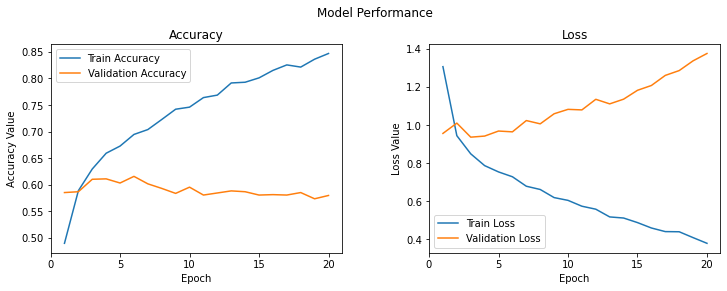

In [14]:
epochs = 20

f, (ax1,ax2) = plt.subplots(1,2,figsize=(12,4))
t = f.suptitle('Model Performance',fontsize=12)
f.subplots_adjust(top=0.85,wspace=0.3)

epoch_list = list(range(1,epochs+1))
ax1.plot(epoch_list,history.history['accuracy'],label='Train Accuracy')
ax1.plot(epoch_list,history.history['val_accuracy'],label='Validation Accuracy')
ax1.set_xticks(np.arange(0,epochs+1,5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list,history.history['loss'],label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0,epochs+1,5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [16]:
x_test1 = x_test/255
test_predictions = model.predict(x_test1)

predictions = label_encoder.classes_[np.argmax(test_predictions,axis=1)]
target_labels = label_encoder.classes_[np.argmax(y_test,axis=1)]

predict_df = pd.DataFrame({'Target Labels' : target_labels,'Predictions': predictions})
predict_df.head(30)

50/50 [==============================] - 22s 432ms/step


,Target Labels,Predictions
0,happy,happy
1,sad,sad
2,sad,happy
3,sad,sad
4,happy,happy
5,sad,happy
6,happy,happy
7,happy,happy
8,sad,sad
9,angry,angry


In [20]:
model.save('model.hdf5')